<a href="https://colab.research.google.com/github/rlarlvy/numerical/blob/main/Lecture_04_Root_Finding1_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bracketing Method
**강좌**: *수치해석*

## 그래프를 이용한 방정식 해 찾기
[낙하산병 문제](../contents/Lecture_01_Exercise_101.ipynb) 에서 아래를 상황을 생각해보자.

질량 $m=68.1kg$인 낙하산병이 자유낙하할 때 10초 후 속도가 $40m/s$ 가 되는 항력 계수는 얼마인가?

엄밀해를 이용하면 다음과 같다.

$$
f(c)= \frac{mg}{c} (1 - e^{(-c/m)t}) - 40 = \frac{9.81(68.1)}{c} (1 - e^{(-c/68.1)10})
$$

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 150

In [ ]:
# 주요 상수
m = 68.1
g = 9.81
t = 10


def f(c):
    # using the exact solution
    pass

In [ ]:
# 4~20 사이에서 값 계산
for c in range(4, 21, 4):
    print(c, f(c))

4 34.19047156669296
8 17.712257537470236
12 6.113943075921462
16 -2.230260706051183
20 -8.368384465361824


Text(0, 0.5, 'y')

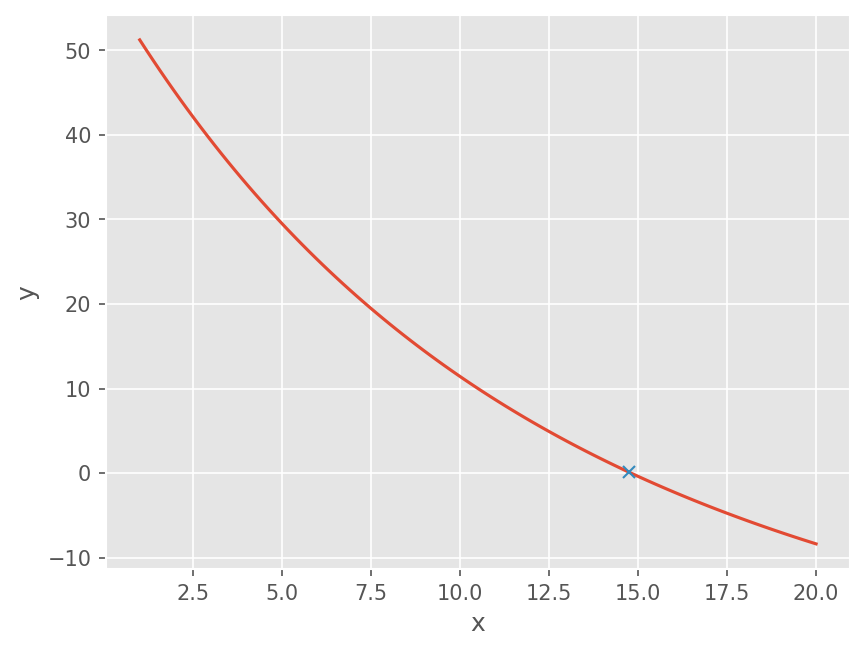

In [ ]:
# 초기 Guess (0, 20), 101 등분


# Plot function f


# From graph (mark at 14.75)


# Label


## Bisection Method
그래프로 구하는 과정을 체계적으로 생각해보면, 구간을 정하고 양 끝 점에서 부호가 같은지 다른지 확인하고 구간을 줄여 나간다.

$$
f(a)\times f(b) < 0
$$

### 알고리즘
* 해가 구간 (a, b) 사이에 있을 때 해가 존재하면 $f(a)\cdot f(b) < 0$ 조건을 활용한다.

* 이 경우 중간 값 $c=\frac{a+b}{2}$ 에 대해

    * $f(a)\cdot f(c) < 0$ 이면 해가 (a, c) 사이에 있다고 범위를 좁힘
    
    * $f(c)\cdot f(b) < 0$ 이면 해가 (c, b) 사이에 있다고 범위를 좁힘

:::{figure-md} markdown-fig
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Bisection_method.svg/412px-Bisection_method.svg.png" alt="bisect-fig">

Bisection method (From Wikipedia)
:::

### By hand
첫번째 구간을 [12, 16] 으로 한 후 진행해보자

In [ ]:
a, b = 12, 16

# Check if the solution lies within the interval [a, b]


True

In [ ]:
# Midpoint c
c =

# 해가 [a, c]. [c, b] 중 어디에 존재하는지 확인


(False, True)

In [ ]:
# 범위를 좁힘
a, b = c?
print("New interval: {}".format((a, b)))

New interval: (14.0, 16)


In [ ]:
# Midpoint
c =

# 해가 [a, c]. [c, b] 중 어디에 존재하는지 확인


(True, False)

In [ ]:
# 범위를 좁힘
a, b = c?
print("New interval: {}".format((a, b)))

New interval: (14.0, 15.0)


In [ ]:
# Midpoint
c =

# 해가 [a, c]. [c, b] 중 어디에 존재하는지 확인


(False, True)

In [ ]:
# Continue ..

(False, True)

#### 종료 판정 기준
위 과정은 무한히 계속될 수 있다. 적당한 해상도 이내에서 계산이 되었으면 멈춰야 한다.

즉 오차가 일정 수준 이내, 상대 오차가 일정 수준 이내이면 멈추기로 한다.

엄밀해를 모르므로 근사 상대 오차 $\epsilon_a$ 의 크기가 $tol$ 보다 작으면 멈춘다.

    
:::{note}
$\epsilon_a< tol$ 이면 멈춘다.
:::

### Make a code
`if` 구문으로 어떤 쪽으로 선택할 지 만들어 본다.

In [ ]:
a, b = 12, 16

# Midpoint
c =

# Iterate (max = 20)
iter_max =
for i in range(iter_max):
    # 해가 [a, c]. [c, b] 중 어디에 존재하는지 확인 후 범위 좁힘

    # Save old midpoint
    c0 =

    # Compute new midpoint
    c =

    # Compute relative error
    if ...
        # Stop and write converged solution
        print("Converged at {}".format(c))
        break
    else:
        print(i, a, b, c)

0 14.0 16 15.0
1 14.0 15.0 14.5
2 14.5 15.0 14.75
3 14.75 15.0 14.875
4 14.75 14.875 14.8125
5 14.75 14.8125 14.78125
6 14.78125 14.8125 14.796875
7 14.796875 14.8125 14.8046875
8 14.796875 14.8046875 14.80078125
9 14.80078125 14.8046875 14.802734375
10 14.80078125 14.802734375 14.8017578125
11 14.80078125 14.8017578125 14.80126953125
12 14.80078125 14.80126953125 14.801025390625
13 14.801025390625 14.80126953125 14.8011474609375
14 14.801025390625 14.8011474609375 14.80108642578125
15 14.80108642578125 14.8011474609375 14.801116943359375
16 14.801116943359375 14.8011474609375 14.801132202148438
Converged at 14.801139831542969


엄밀해가 $c = 14.8011$ 임을 이용해서 상대오차를 구해보자.

In [ ]:
a, b = 12, 16

# Midpoint
c =

c_ex = 14.8011

# 상대오차 (참, 근사)
eps_t = []
eps_a = []

# Iterate (max = 20)
iter_max = 20
for i in range(iter_max):
    # 해가 [a, c]. [c, b] 중 어디에 존재하는지 확인 후 범위 좁힘

    # Save old midpoint
    c0 =

    # Compute new midpoint
    c =

    # Compute relative errors
    # w.r.t true value
    eps_ti =

    # w.r.t. approximate value
    eps_ai =

    # Save in the lists


    # Compute relative error
    if ...
        # Stop and write converged solution
        print("Converged at {}".format(c))
        break
    else:
        print(i, a, b, c, eps_ti, eps_ai)

0 14.0 16 15.0 0.013260000000000004 0.06666666666666667
1 14.0 15.0 14.5 0.020765517241379306 0.034482758620689655
2 14.5 15.0 14.75 0.0034644067796610117 0.01694915254237288
3 14.75 15.0 14.875 0.004968067226890762 0.008403361344537815
4 14.75 14.875 14.8125 0.0007696202531645622 0.004219409282700422
5 14.75 14.8125 14.78125 0.0013429175475687051 0.0021141649048625794
6 14.78125 14.8125 14.796875 0.0002855332629355809 0.0010559662090813093
7 14.796875 14.8125 14.8046875 0.00024232189973615295 0.0005277044854881266
8 14.796875 14.8046875 14.80078125 2.1536025336495212e-05 0.0002639218791237794
9 14.80078125 14.8046875 14.802734375 0.00011041034437261371 0.00013194352816994325
10 14.80078125 14.802734375 14.8017578125 4.444151217259871e-05 6.597611664577422e-05
11 14.80078125 14.8017578125 14.80126953125 1.145383168937938e-05 3.298914657077821e-05
12 14.80078125 14.80126953125 14.801025390625 5.040824742262857e-06 1.6494845360824743e-05
13 14.801025390625 14.80126953125 14.8011474609375

Text(0, 0.5, 'Error')

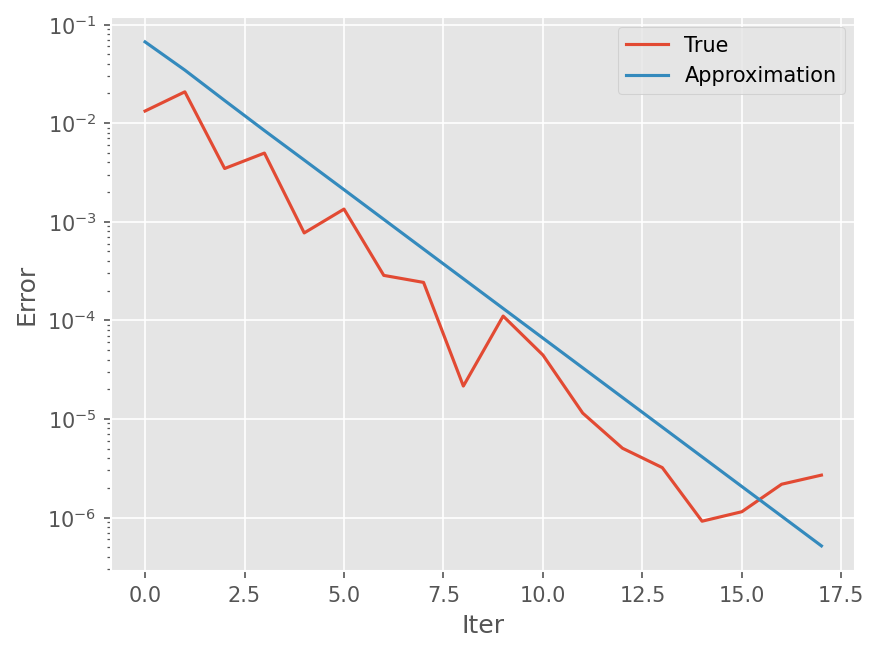

In [ ]:
# Plot errors in log-scale

# Legend and Label


- Bisection method를 진행하면서 오차의 범위가 절반씩 줄어든다.

#### Recursive algorithm

함수 안에서 함수를 호출

:::{figure-md} Recursive-algorihm
<img src="https://upload.wikimedia.org/wikipedia/commons/b/b3/Screenshot_Recursion_via_vlc.png" alt="recursiv-fig">

Recursive algorihm (From Wikipedia)
:::

:::{note}
$\epsilon_a$ 계산시 $c=0$ 일 때 분모가 0이 될 수 있다. 분모에 매우 작은 값을 더하자.
:::

In [ ]:
def bisect(a, b, f, c0=a, tol=1e-6):
    """
    Bisection method

    Parameters
    ----------
    a : float
        Lower limit
    b : float
        Upper limit
    c0 : float
        Previous solution
    f : function
        함수
    tol : float
        Tolerance
    """
    # Compute product = f(a) x f(b)

    # 구간 경계에서 해가 존재한 경우
    if product == 0:
        # a 또는 b에서 수렴하는 경우

    elif product > 0:
        # 같은 부호 이므로 이 구간 내에 해가 존재하지 않음
        raise ValueError('Wrong Intervals')

    else:
        # Compute midpoint
        c = 0.5*(a+b)

        # Convergence 조건
        if
            print('Converged at {:.7g}'.format(c))

            return c
        elif
            # 해는 (a,c) 사이에 존재함, 범위 좁히기

        else:
            # 해는 (c,a) 사이에 존재함, 범위 좁히기


In [ ]:
bisect(12, 16, f)

Converged at 14.80114


### 구간 설정
- Bracketing method는 적절한 구간 설정이 중요함
- 1개의 해를 포함하는 구간을 설정해야 함

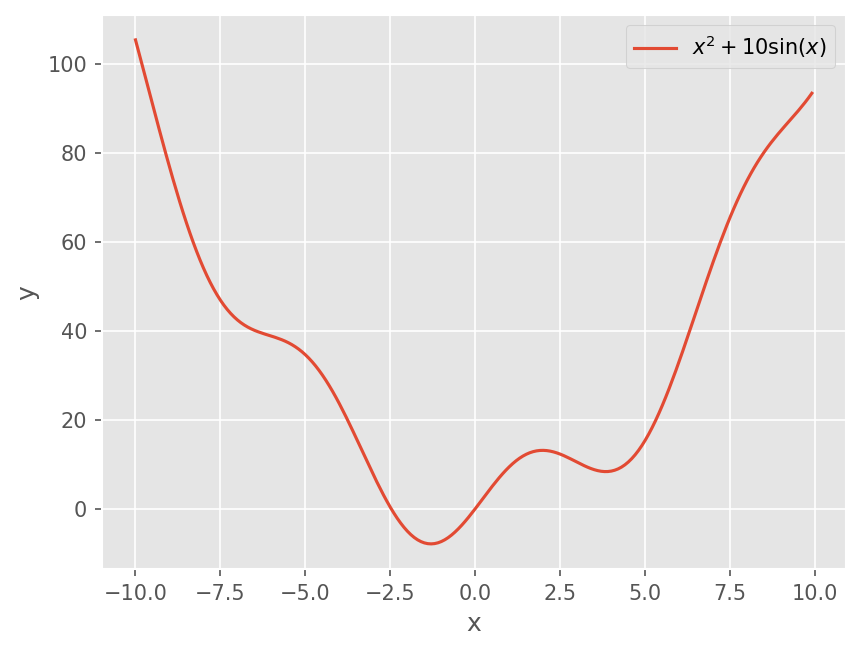

In [ ]:
x = np.arange(-10, 10, 0.1)

def f1(x):
    return x**2 + 10*np.sin(x)

plt.plot(x, f1(x))
plt.xlabel('x')
plt.ylabel('y')
plt.legend(["$x^2 + 10\sin(x)$"])

In [ ]:
# Left solution


Converged at -2.479483


In [ ]:
# x= 0

0.0

In [ ]:
# Right solution


Converged at 0


In [ ]:
# Wrong Interval 1 (-10, -5)

ValueError: Wrong Intervals

In [ ]:
# Wrong Interval 2 (-5, 5)
bisect(-5, 5, f1)

ValueError: Wrong Intervals

### DIY
`For-Loop` 를 이용하여 Bisection method 계산 함수를 만드시오. 아래 기능도 같이 구현하시오.
- boolean 형식의 *verbose* keyword argument를 추가하라.
    * True 일 경우 중간 계산 결과 및 상대 오차를 출력한다.
    * False 일 경우 최종 해만 출력한다.
    * 기본 값은 False로 한다.

## Method of False Position

Bisection method 보다 계산 효율을 높이기 위해 가 위치 (False position)를 사용한다.

이 위치는 중점 대신에 양 끝점을 직선으로 이었을 때 교점을 사용한다.

아래 그림을 보면 다음 관계로 가 위치를 구한다.

$$
\frac{f(a)}{c - a} = \frac{f(b)}{c - b}
$$

이를 정리하면 다음과 같다.

$$
c = \frac{b f(a) - a f(b)} {f(a) - f(b)} = b - \frac{f(b)(a-b)}{f(a) - f(b)}
$$

:::{figure-md} false-pos-fig
<img src="https://upload.wikimedia.org/wikipedia/commons/9/97/False_position_method.svg" alt="false-pos-fig">

Method of false position (From Wikimedia)
:::

### 알고리즘
* 해가 구간 (a, b) 사이에 있을 때 해가 존재하면 $f(a)\cdot f(b) < 0$ 조건을 활용한다.

* 이 경우 중간 값 $c=b - \frac{f(b)(a-b)}{f(a) - f(b)}$ 에 대해

    * $f(a)\cdot f(c) < 0$ 이면 해가 (a, c) 사이에 있다고 범위를 좁힘
    
    * $f(c)\cdot f(b) < 0$ 이면 해가 (c, b) 사이에 있다고 범위를 좁힘

In [ ]:
a, b = 12, 16
c =

# Exact value
c_ex = 14.8011

# 상대오차 (참, 근사)
eps_t = []
eps_a = []

# Iterate (max = 20)
iter_max = 20
for i in range(iter_max):
    # 해가 [a, c]. [c, b] 중 어디에 존재하는지 확인 후 범위 좁힘

    # Save old midpoint
    c0 =

    # Compute new midpoint
    c =

    # Compute relative errors
    # w.r.t true value
    eps_ti =

    # w.r.t. approximate value
    eps_ai =

    # Save in the lists

    # Compute relative error
    if ...
        # Stop and write converged solution
        print("Converged at {}".format(c))
        break
    else:
        print(i, a, b, c, eps_ti, eps_ai)

0 12 14.930869492487908 14.815076015455954 0.0009433644107781617 0.007815921896799652
1 12 14.815076015455954 14.802632653525668 0.00010353925288440446 0.0008406181671557055
2 12 14.802632653525668 14.80129662906239 1.328458359549417e-05 9.026401515760205e-05
3 12 14.80129662906239 14.801153195602156 3.594017402097734e-06 9.690694930243335e-06
4 12 14.801153195602156 14.801137796968773 2.5536529212191533e-06 1.040368219980068e-06
Converged at 14.801136143814386


Text(0, 0.5, 'Error')

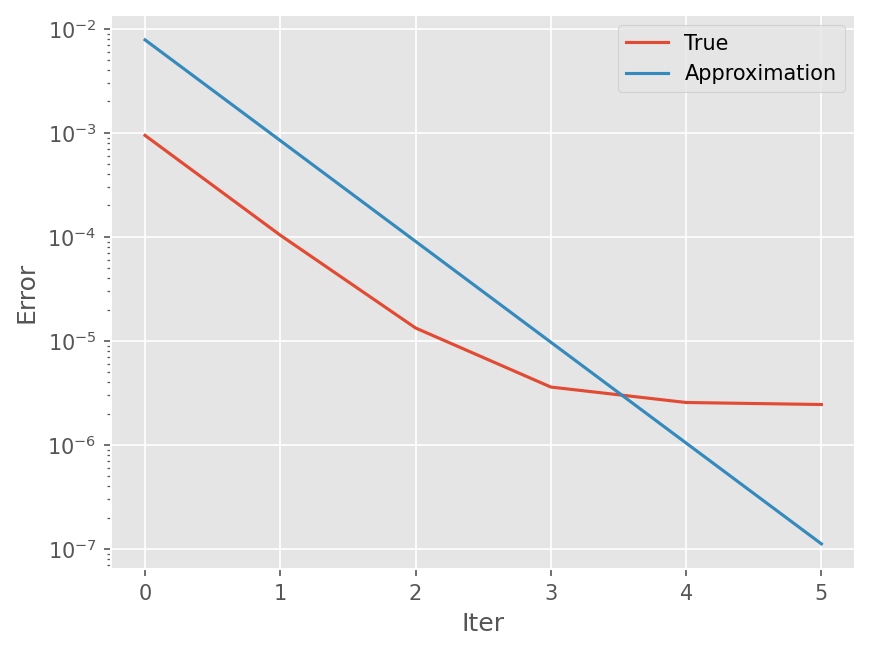

In [ ]:
# Plot errors in log-scale

# Legend and Label


### DIY
Method of False Position 함수를 `For-loop` 버전과 `Recursive algorithm` 버전으로 완성하시오.

### 문제점
- 곡률이 큰 함수에서 수렴이 매우 느릴 수 있다.

x 가 $[0, 1.3]$ 사이일 때 아래 함수의 해를 구하시오.

$$
f(x) = x^{10} - 1
$$

In [ ]:
# 함수 정의 (using lambda)


Text(0, 0.5, 'y')

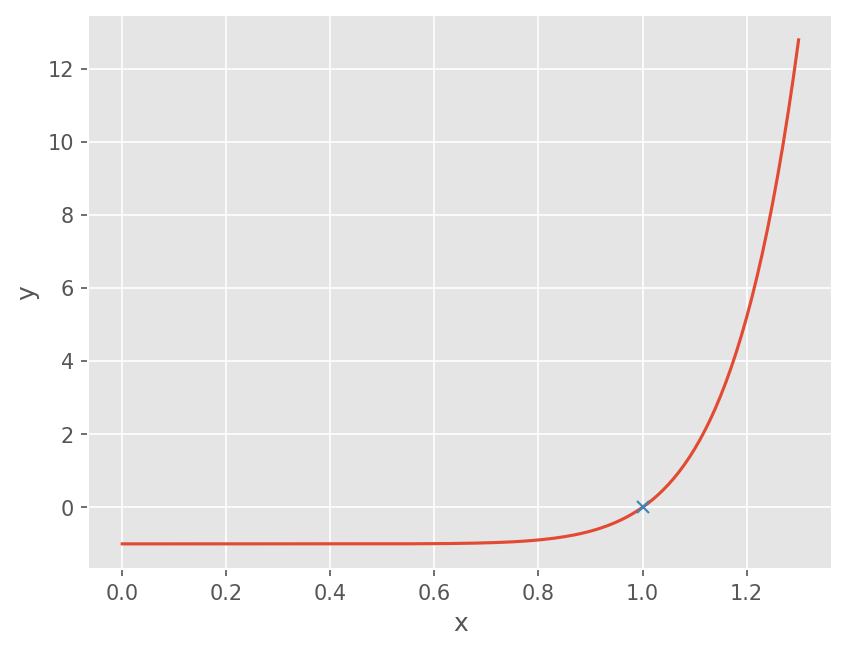

In [ ]:
x = np.linspace(0, 1.3, 131)

# Plot f(x)

# Mark at (1,0)

# Labels


In [ ]:
a, b = 0, 1.3
c = 0.5*(a+b)

c_ex = 1

# 상대오차 (참, 근사)
eps_t = []
eps_a = []

# 해석 결과
cs = []

# Using bisection method (iter_max = 25)

0 0.65 1.3 0.9750000000000001 0.025641025641025546 0.33333333333333337
1 0.9750000000000001 1.3 1.1375000000000002 0.12087912087912102 0.1428571428571429
2 0.9750000000000001 1.1375000000000002 1.0562500000000001 0.053254437869822605 0.07692307692307696
3 0.9750000000000001 1.0562500000000001 1.015625 0.015384615384615385 0.04000000000000013
4 0.9750000000000001 1.015625 0.9953125 0.004709576138147522 0.020408163265306076
5 0.9953125 1.015625 1.00546875 0.005439005439005351 0.01010101010100997
6 0.9953125 1.00546875 1.000390625 0.00039047247169083456 0.005076142131979517
7 0.9953125 1.000390625 0.9978515625000001 0.0021530632217654447 0.002544529262086536
8 0.9978515625000001 1.000390625 0.9991210937500001 0.0008796794057275569 0.0012706480304956191
9 0.9991210937500001 1.000390625 0.9997558593750001 0.0002442002442001331 0.0006349206349206127
10 0.9997558593750001 1.000390625 1.0000732421875 7.323682347488755e-05 0.00031735956839092034
11 0.9997558593750001 1.0000732421875 0.999914550

Text(0, 0.5, 'y')

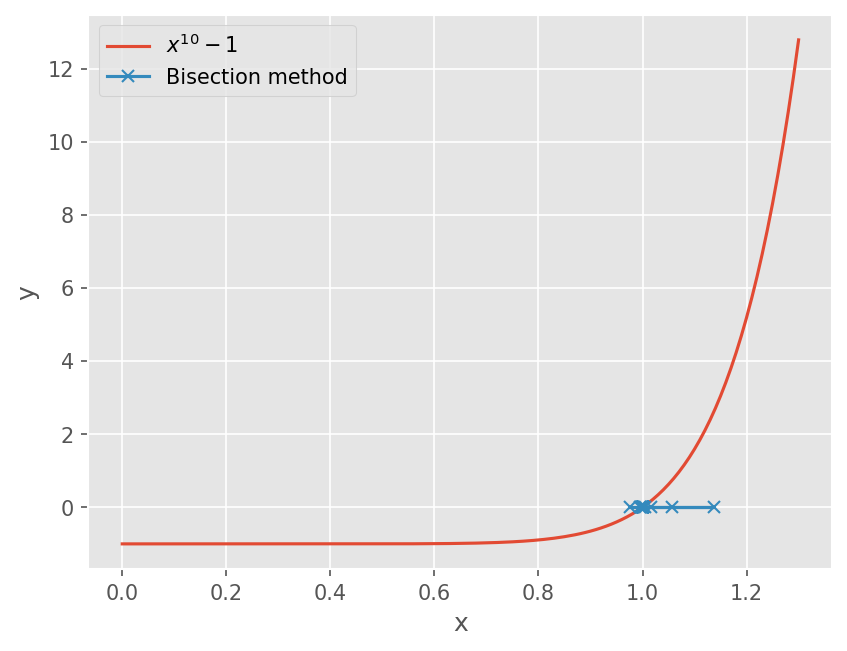

In [ ]:
x = np.linspace(0, 1.3, 131)

# Plot f(x)

# Mark all values of bisection method

# Legend and Labels

Text(0, 0.5, 'Error')

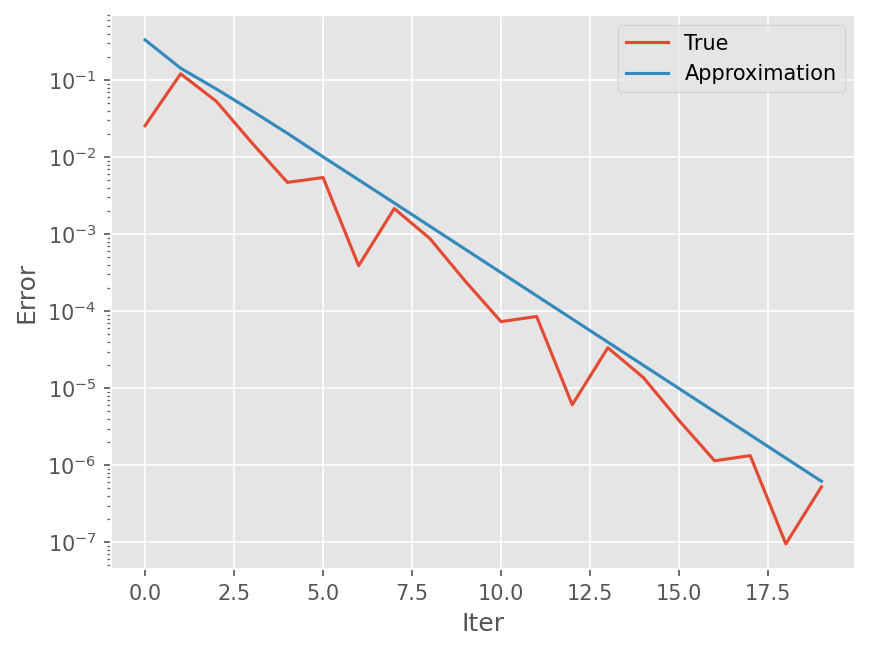

In [ ]:
# Plot errors in log-scale

# Legend and Label


In [ ]:
a, b = 0, 1.3

# False position
c =

c_ex = 1

# 상대오차 (참, 근사)
eps_t = []
eps_a = []

# 해석 결과
cs = []

# Using false position method (iter_max = 25)

0 0.09429959537232735 1.3 0.1817588725190793 4.501794691728348 0.48118298674839827
1 0.1817588725190793 1.3 0.2628740125203042 2.804103686068096 0.3085704030745893
2 0.2628740125203042 1.3 0.3381051033222693 1.9576601777786151 0.22250800139581925
3 0.3381051033222693 1.3 0.4078779165927523 1.4517140039195966 0.17106298338811027
4 0.4078779165927523 1.3 0.4725831535623899 1.116029724000691 0.13691820472626154
5 0.4725831535623899 1.3 0.5325715106320141 0.8776821141132359 0.11263906512467173
6 0.5325715106320141 1.3 0.5881445691706797 0.7002622355419552 0.09448877274685547
7 0.5881445691706797 1.3 0.6395439707682155 0.5636141464969289 0.08036883145938375
8 0.6395439707682155 1.3 0.6869431667412387 0.45572450300926454 0.06900017100086796
9 0.6869431667412387 1.3 0.7304464366929376 0.3690257762464468 0.05955709791488338
10 0.7304464366929376 1.3 0.7700987444968072 0.29853477511304527 0.05148990059681097
11 0.7700987444968072 1.3 0.8059075090169237 0.24083717897086934 0.044432846349573514
1

Text(0, 0.5, 'y')

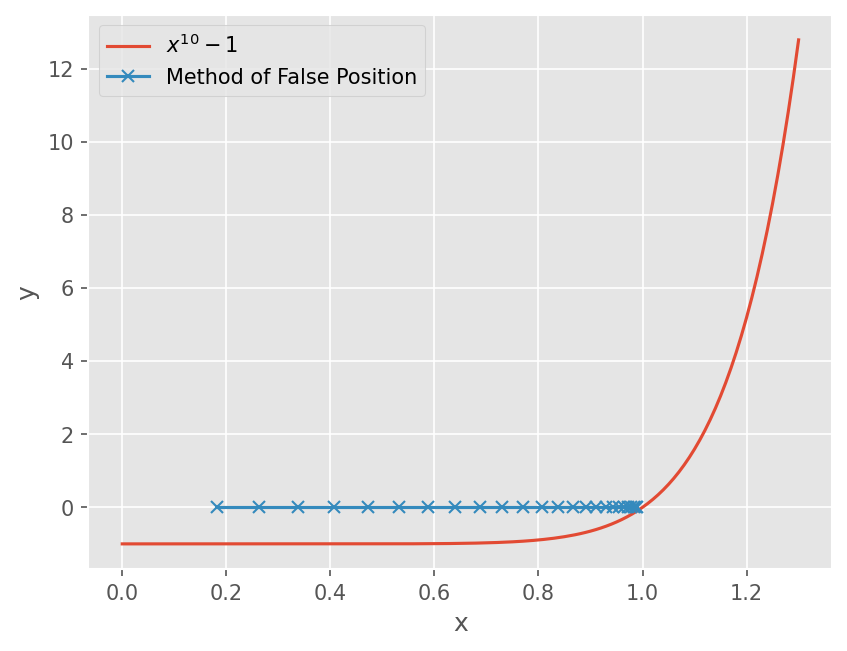

In [ ]:
x = np.linspace(0, 1.3, 131)

# Plot f(x)

# Mark all values of bisection method

# Legend and Labels

Text(0, 0.5, 'Error')

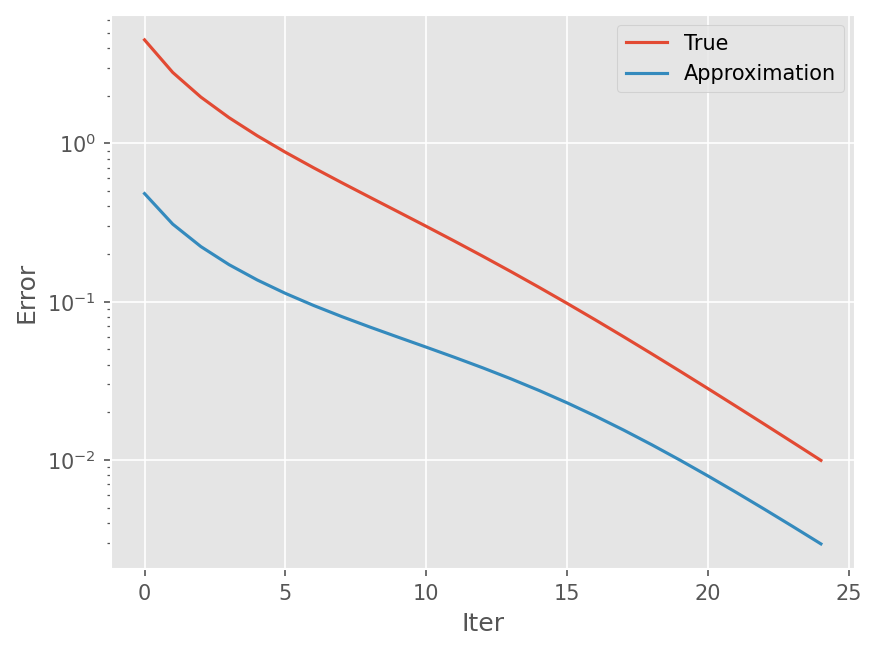

In [ ]:
# Plot errors in log-scale

# Legend and Label


## SciPy 활용
`scipy.optimize` 모듈은 최소화, Curve fitting 그리고 root finding과 관련된 다양한 알고리듬을 제공한다.

**참고**
* https://scipy-lectures.org/intro/scipy.html#optimization-and-fit-scipy-optimize
* https://docs.scipy.org/doc/scipy/reference/optimize.html

In [ ]:
from scipy.optimize import root_scalar
# root_scalar?

In [ ]:
root_scalar(f, bracket=[0, 1.3])

      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 9
           root: 0.9999999999998475